In [24]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pb

df = pd.read_csv(r'C:\Users\omar.aziz\Desktop\Rice Data Analytics\GDPpercapita.csv')
df2 = pd.read_csv(r'C:\Users\omar.aziz\Desktop\Rice Data Analytics\domesticcredit.csv')
df3 = pd.read_csv(r'C:\Users\omar.aziz\Desktop\Rice Data Analytics\ruralpopaspercentage.csv')

df2.head()


,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,58.46,57.41,nan,nan,nan,nan,nan,nan
1,Afghanistan,AFG,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,11.52,4.92,4.34,4.34,4.03,3.96,3.60,nan
2,Angola,AGO,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,20.22,20.18,22.26,23.39,22.89,27.22,21.13,nan
3,Albania,ALB,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,37.51,39.46,39.06,38.01,37.53,35.64,34.72,nan
4,Andorra,AND,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,nan,nan,nan,nan,nan,nan,nan,nan


In [25]:
dfgdp = df.drop(df.columns[[2,3,4,5,6,7,8,9,10,12]], axis = 1)
dfdomcred = df2.drop(df2.columns[[2,3,4,5,6,7,8,9,11]], axis = 1)
dfruralpop = df3.drop(df3.columns[[2,3,4,5,6,7,8,9,11]], axis = 1)


In [26]:
dfruralpop.head()

,Country Name,Country Code,2016
0,Aruba,ABW,58.70
1,Afghanistan,AFG,72.87
2,Angola,AGO,55.18
3,Albania,ALB,41.62
4,Andorra,AND,15.39


In [27]:
pd.options.display.float_format = '{:,.2f}'.format
dfgdp.head()

,Country Name,Country Code,2017
0,Aruba,ABW,"25,655.10"
1,Afghanistan,AFG,550.07
2,Angola,AGO,"4,100.29"
3,Albania,ALB,"4,537.58"
4,Andorra,AND,"39,146.55"


In [28]:
table = pd.merge(dfruralpop,dfgdp, on='Country Code')
merge_table = pd.merge(table,dfdomcred, on='Country Code')

In [29]:
merge_table.head()

,Country Name_x,Country Code,2016_x,Country Name_y,2017,Country Name,2016_y
0,Aruba,ABW,58.70,Aruba,"25,655.10",Aruba,nan
1,Afghanistan,AFG,72.87,Afghanistan,550.07,Afghanistan,3.60
2,Angola,AGO,55.18,Angola,"4,100.29",Angola,21.13
3,Albania,ALB,41.62,Albania,"4,537.58",Albania,34.72
4,Andorra,AND,15.39,Andorra,"39,146.55",Andorra,nan


In [30]:
merge2 = merge_table.drop(merge_table.columns[[3,5]], axis = 1)
merge2.head()

,Country Name_x,Country Code,2016_x,2017,2016_y
0,Aruba,ABW,58.70,"25,655.10",nan
1,Afghanistan,AFG,72.87,550.07,3.60
2,Angola,AGO,55.18,"4,100.29",21.13
3,Albania,ALB,41.62,"4,537.58",34.72
4,Andorra,AND,15.39,"39,146.55",nan


In [31]:
merge2.rename(columns={'Country Name_x':'Country','2016_x':'% of Rural Pop.','2017':'GDP Per Capita','2016_y':'Dom. Credit to Prvt Sector as % of GDP'}, inplace=True)

In [32]:
merge_final = merge2.sort_values(by=['GDP Per Capita'], ascending=False)
merge_final.head(25)

,Country,Country Code,% of Rural Pop.,GDP Per Capita,Dom. Credit to Prvt Sector as % of GDP
142,Luxembourg,LUX,9.57,"104,103.04",102.39
144,"Macao SAR, China",MAC,0.00,"80,892.82",118.10
35,Switzerland,CHE,26.01,"80,189.70",175.26
175,Norway,NOR,19.27,"75,504.57",144.80
112,Iceland,ISL,5.77,"70,056.87",87.32
109,Ireland,IRL,36.47,"69,330.69",47.45
198,Qatar,QAT,0.68,"63,249.42",79.38
249,United States,USA,18.21,"59,531.66",192.17
168,North America,NAC,18.19,"58,070.07",192.17
206,Singapore,SGP,0.00,"57,714.30",132.91


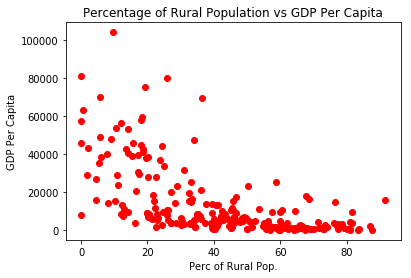

In [35]:
x = merge_final['% of Rural Pop.']
y = merge_final['GDP Per Capita']

plt.title("Percentage of Rural Population vs GDP Per Capita")
plt.xlabel("Perc of Rural Pop.")
plt.ylabel("GDP Per Capita")
plt.scatter(x,y, marker="o", color="red")


In [ ]:
# Countries with a higher percentage of rural populations tend to have lower GDP per capitas. 

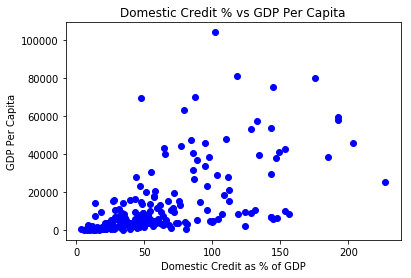

In [42]:
x2 = merge_final['Dom. Credit to Prvt Sector as % of GDP']
y2 = merge_final['GDP Per Capita']

plt.title("Domestic Credit % vs GDP Per Capita")
plt.xlabel("Domestic Credit as % of GDP")
plt.ylabel("GDP Per Capita")
plt.scatter(x2,y2, marker="o", color="blue")

In [ ]:
# There seems to be a relationship between how much domestic credit is invested in domestic businesses. 
# The more credit lended domestically, the higher the GDP per capital is generally. 